In [1]:
%matplotlib inline

import sys

sys.path.append("..")

In [21]:
import os
import pickle
import shutil
import torch

from torch.nn import PairwiseDistance, CosineSimilarity
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm_notebook as tqdm

from src.datasets import get_dataset, get_dataset_class_names
from src.models.hog import HOGLayer
from src.utils import get_device
from src.visualization import plot_image_batch, plot_image

In [25]:
dataset_name = 'sketchy_sketches'
embedding_directory_name = 'hog_sketches_gist'
query_image_filename = r'C:\Users\Chopan\Documents\Data\sketchy\sketch\tx_000000000000\swan\n01858441_2970-2.png'
in_channels = 3
cell_size = 24
n_bins = 9
signed_gradients = False
batch_size = 32
workers = 6
n_gpu = 0
k = 16
distance = 'cosine'

In [13]:
device = get_device(n_gpu)
dataset = get_dataset(dataset_name, transforms.Grayscale(num_output_channels=1))
model = HOGLayer()

In [ ]:
model = model.to(device)

outputs = []

for i, data in tqdm(enumerate(dataset), total=len(dataset)):
    image, label = data
    image = image.to(device)
    output = model(image.unsqueeze(0))
    outputs.append(output)

In [45]:
outputs[0].shape

torch.Size([1, 256, 256])

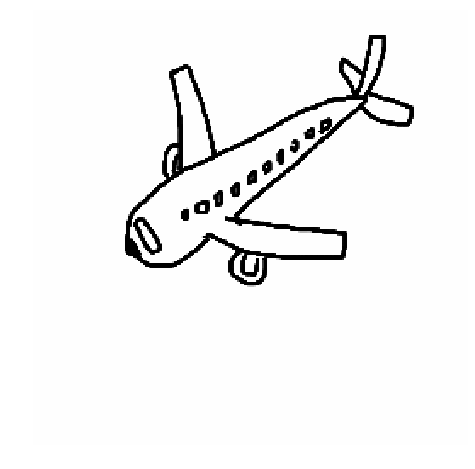

In [27]:
image, image_class = dataset[0]
image = image.to(device)
plot_image_batch([image, image_class])

In [32]:
len(embeddings)

75481

In [33]:
embeddings[0].shape

torch.Size([1, 256, 256])

In [34]:
torch.cat(embeddings).shape

torch.Size([75481, 256, 256])

In [35]:
embeddings = torch.cat(embeddings)

In [41]:
embeddings.shape

torch.Size([75481, 256, 256])

In [39]:
query_embedding = model(image.unsqueeze(0))
p_dist = PairwiseDistance(p=2) if distance == 'pairwise' else CosineSimilarity()

In [40]:
query_embedding.shape

torch.Size([1, 10240])

In [37]:
distances = p_dist(embeddings, query_embedding)
# Return the top k results
top_distances, top_indices = torch.topk(distances, k)
aux = [dataset[j] for j in top_indices]
image_tensors = torch.stack([tup[0] for tup in aux])
image_classes = [tup[1] for tup in aux]
image_class_names = get_dataset_class_names(dataset_name)
print('query image class = {}'.format(image_class_names[image_class]))
print('distances = {}'.format(top_distances))
print('classes = {}'.format([image_class_names[class_name] for class_name in image_classes]))
plot_image_batch([image_tensors, image_classes])

NameError: name 'distances' is not defined